In [39]:
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
from sklearn.cluster import KMeans

In [40]:
df = pd.read_csv("Mall_Customers.csv")
df.info()
df.shape
df.isnull().sum()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,0
196,197,45,126,28,0
197,198,32,126,74,1
198,199,32,137,18,1


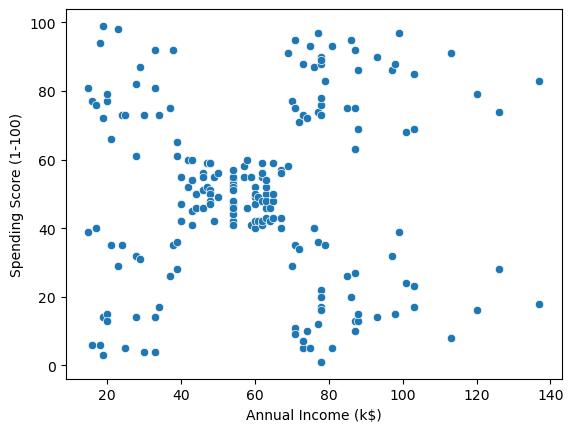

In [41]:
df = pd.get_dummies(df,dtype = int,drop_first = True)
df
sns.scatterplot(data  = df,
                x = "Annual Income (k$)",
                y = "Spending Score (1-100)"
)
df

In [42]:
x = df[["Annual Income (k$)","Spending Score (1-100)"]]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [43]:
from sklearn.cluster import KMeans
model  = KMeans(
    n_clusters = 5,
    random_state = 42
)


In [44]:
labels = model.fit_predict(x_scaled)
df

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,0
196,197,45,126,28,0
197,198,32,126,74,1
198,199,32,137,18,1


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

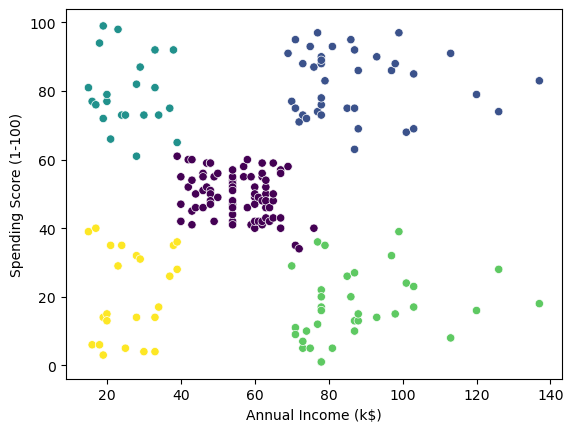

In [45]:
sns.scatterplot(
    data = df,
    x = "Annual Income (k$)",
    y = "Spending Score (1-100)",
    c = labels
  
)

In [46]:
# improve model by Elbow Method

In [47]:
wcss = []

for k in range (1,21):
    model2 = KMeans(n_clusters=k)
    model2.fit_predict(x_scaled)
    wcss.append(model2.inertia_)


<Axes: >

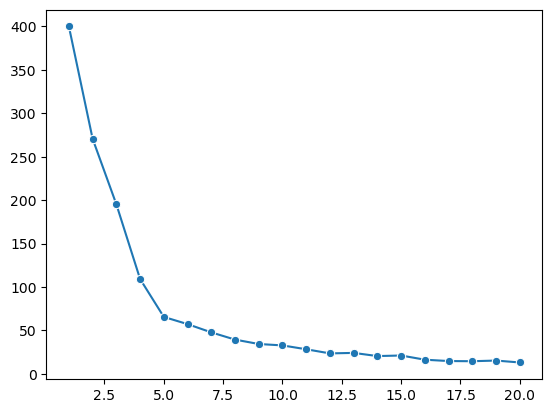

In [48]:
sns.lineplot(x = range(1,21),y = wcss,marker='o')

In [49]:
# to choose best value of k automatic ,we use kneed
knee = KneeLocator(range(1, 21), wcss, curve="convex", direction="decreasing")
print("best value of k = ",knee.elbow)

best value of k =  5
